# TELECOM CHURN CASE STUDY



## Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Business Goal

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Data Preparation

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset

df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Filter high value Customers

In [6]:
# Get the average recharge amount for 6 and 7 month
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

# Get the data greater than 70th percentile of average recharge amount
df = df.loc[(df['avg_rech_amt_6_7'] > np.percentile(df['avg_rech_amt_6_7'],
                                                    70))]

# drop the average column
df.drop(['avg_rech_amt_6_7'], axis=1, inplace=True)

print(df.shape)

df.reset_index(inplace=True, drop=True)

(29979, 226)


### Tag churners and remove attributes of the churn phase


- Tagging Churners 

    - Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

      - total_ic_mou_9
      - total_og_mou_9
      - vol_2g_mb_9
      - vol_3g_mb_9

- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

#### Tagging churners.

Following steps used
 
1. Find the total sum of -- total_ic_mou_9 + total_og_mou_9 + vol_2g_mb_9 + vol_3g_mb_9
     
2. if the sum is 0 then we label the customer as churn - 1 else not churn - 0

In [7]:
churn_sum = df['total_ic_mou_9'] + df['total_og_mou_9'] + df[
    'vol_2g_mb_9'] + df['vol_3g_mb_9']

df['churn'] = np.where(churn_sum == 0, 1, 0)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.

In [8]:
df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
    'churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.0,0.0,1
1,34.91,142.18,0.0,0.0,0
2,631.86,446.09,0.0,0.0,0
3,334.56,255.74,0.0,0.0,0
4,87.13,631.08,0.0,0.0,0


#### Removing churn phase attribute

In [9]:
#Extract sept cols


def sept_cols(df):
    sept_cols = []
    for i in range(0, len(df.columns)):
        if any(pd.Series(df.columns[i]).str.contains('_9|sep')):
            sept_cols.append(df.columns[i])
    return sept_cols


sept_cols = sept_cols(df)
df.drop(sept_cols, axis=1, inplace=True)
df.shape

(29979, 172)

### Missing value treatment

In [10]:
missing_col = round(100 * (df.isnull().sum() / df.shape[0]),
                    2).sort_values(ascending=False)
missing_col[missing_col != 0]

max_rech_data_6         62.02
total_rech_data_6       62.02
arpu_2g_6               62.02
count_rech_3g_6         62.02
count_rech_2g_6         62.02
                        ...  
std_og_t2o_mou           0.38
loc_og_t2o_mou           0.38
date_of_last_rech_7      0.38
date_of_last_rech_6      0.21
last_date_of_month_7     0.10
Length: 125, dtype: float64

 Many of these columns are empty because the customer did not opt for the services or did not recharge for that month, we can imput 0 for these columns

In [11]:
def impute0(colname):
    df[colname].fillna(0, inplace=True)


colList = [
    'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g',
    'av_rech_amt_data', 'arpu_2g', 'arpu_3g'
]

for col in [c + m for c in colList for m in ['_6', '_7', '_8']]:
    impute0(col)

In [12]:
#fb_user and night_pck_user are categorical features with 0 and 1 as values, we will impute 2 for NA values.

for col in [
        c + m for c in ['fb_user', 'night_pck_user']
        for m in ['_6', '_7', '_8']
]:
    df[col].fillna(2, inplace=True)

In [13]:
#imputing last dates missing values
df['last_date_of_month_7'].fillna('7/31/2014', inplace=True)
df['last_date_of_month_8'].fillna('8/31/2014', inplace=True)

In [14]:
missing_col = round(100 * (df.isnull().sum() / df.shape[0]),
                    2).sort_values(ascending=False)
missing_col[missing_col != 0]

date_of_last_rech_data_6    62.02
date_of_last_rech_data_7    61.13
date_of_last_rech_data_8    60.84
std_ic_t2f_mou_8             3.13
loc_og_t2m_mou_8             3.13
                            ...  
loc_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
date_of_last_rech_7          0.38
std_og_t2o_mou               0.38
date_of_last_rech_6          0.21
Length: 96, dtype: float64

In [15]:
m = list(missing_col.loc[missing_col < 5].index)
m.remove("date_of_last_rech_6")
m.remove("date_of_last_rech_7")
m.remove("date_of_last_rech_8")

#impute 0 for these rows

for col in m:
    impute0(col)

In [16]:
#check for missing values again
missing_col = round(100 * (df.isnull().sum() / df.shape[0]),
                    2).sort_values(ascending=False)
missing_col[missing_col != 0]

date_of_last_rech_data_6    62.02
date_of_last_rech_data_7    61.13
date_of_last_rech_data_8    60.84
date_of_last_rech_8          1.98
date_of_last_rech_7          0.38
date_of_last_rech_6          0.21
dtype: float64

In [17]:
#extract all the columns which have only 0 values
zero_columns = list(df.columns[(df == 0).all()])
zero_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [18]:
df.drop(zero_columns, axis=1, inplace=True)

In [19]:
date_cols = [
    'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
    'date_of_last_rech_data_8'
]

for i in date_cols:
    print("Values for ", i)
    print(df[i].unique())
    print("==============")

Values for  date_of_last_rech_data_6
[nan '6/30/2014' '6/29/2014' '6/17/2014' '6/11/2014' '6/10/2014'
 '6/20/2014' '6/12/2014' '6/13/2014' '6/25/2014' '6/21/2014' '6/26/2014'
 '6/16/2014' '6/14/2014' '6/24/2014' '6/28/2014' '6/4/2014' '6/2/2014'
 '6/27/2014' '6/15/2014' '6/9/2014' '6/22/2014' '6/6/2014' '6/19/2014'
 '6/23/2014' '6/7/2014' '6/18/2014' '6/5/2014' '6/3/2014' '6/8/2014'
 '6/1/2014']
Values for  date_of_last_rech_data_7
[nan '7/31/2014' '7/28/2014' '7/26/2014' '7/27/2014' '7/10/2014'
 '7/16/2014' '7/29/2014' '7/23/2014' '7/5/2014' '7/18/2014' '7/9/2014'
 '7/24/2014' '7/2/2014' '7/14/2014' '7/13/2014' '7/22/2014' '7/30/2014'
 '7/20/2014' '7/21/2014' '7/7/2014' '7/25/2014' '7/8/2014' '7/17/2014'
 '7/15/2014' '7/19/2014' '7/3/2014' '7/11/2014' '7/6/2014' '7/12/2014'
 '7/4/2014' '7/1/2014']
Values for  date_of_last_rech_data_8
[nan '8/23/2014' '8/30/2014' '8/26/2014' '8/2/2014' '8/31/2014' '8/7/2014'
 '8/25/2014' '8/21/2014' '8/24/2014' '8/29/2014' '8/6/2014' '8/17/2014'
 '8/10

## Data Exploration 

### Churn Variable

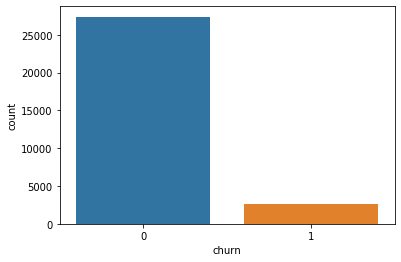

In [20]:
sns.countplot(x='churn', data=df)

#####  We see that the data is highly imbalanced with very small amount of churners. 

In [21]:
#Get the count of of the churn variable

df['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [22]:
print('Churn Rate : {0}%'.format(
    round(((sum(df['churn']) / len(df['churn'])) * 100), 2)))

Churn Rate : 8.64%


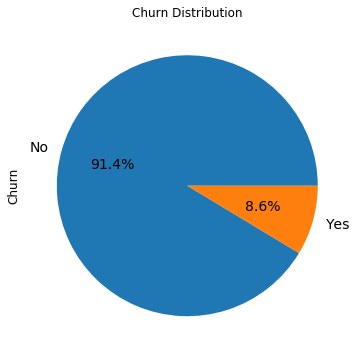

In [23]:
#Churn Distribution
pie_chart = df['churn'].value_counts() * 100.0 / len(df)
ax = pie_chart.plot.pie(autopct='%.1f%%',
                        labels=['No', 'Yes'],
                        figsize=(8, 6),
                        fontsize=14)
ax.set_ylabel('Churn', fontsize=12)
ax.set_title('Churn Distribution', fontsize=12)
plt.show()

### Monthly data attribute

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

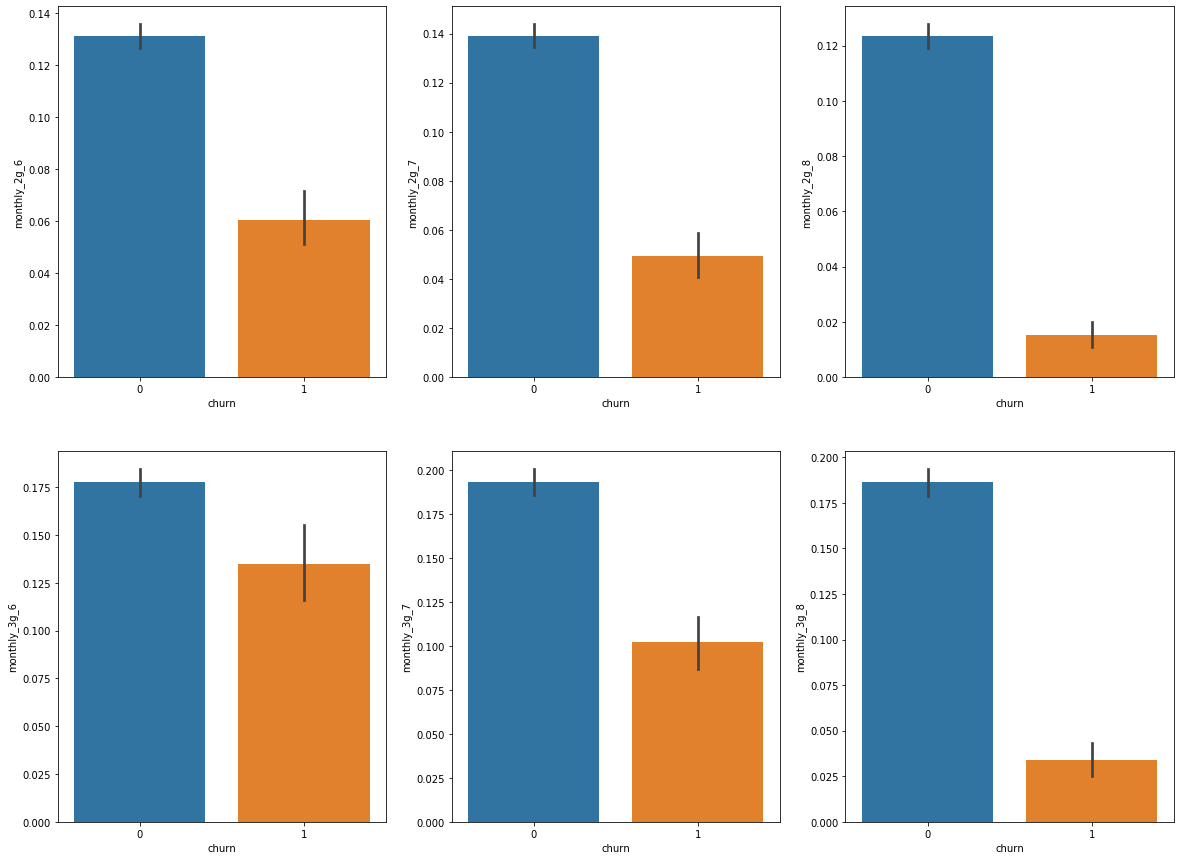

In [24]:
monthly_2g_3g = list(df.columns[df.columns.str.contains(
    'monthly_2g|monthly_3g', regex=True)])

plt.figure(figsize=(20, 15))

for i, d in enumerate(monthly_2g_3g):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

##### We can observe constant behavior among non churners, we can observe steady decline among the churners, there is reduced activity in the action phase, in the month of August

### Data Volume attribute

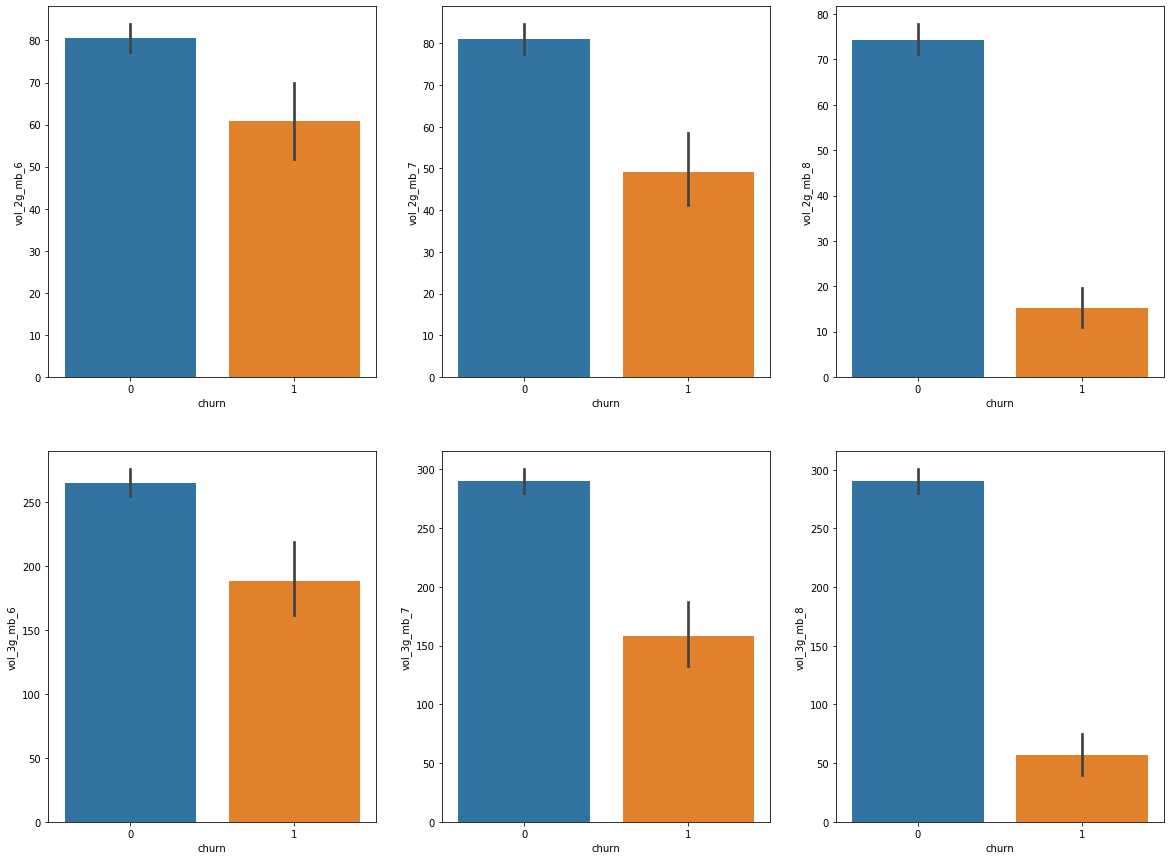

In [25]:
vol_2g_3g = list(df.columns[df.columns.str.contains('vol_2g_mb|vol_3g_mb',
                                                    regex=True)])

plt.figure(figsize=(20, 15))

for i, d in enumerate(vol_2g_3g):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

##### We can observe constant behavior among non churners, we can observe steady decline among the churners, there is reduced activity in the action phase, in the month of August

### Average revenue per User

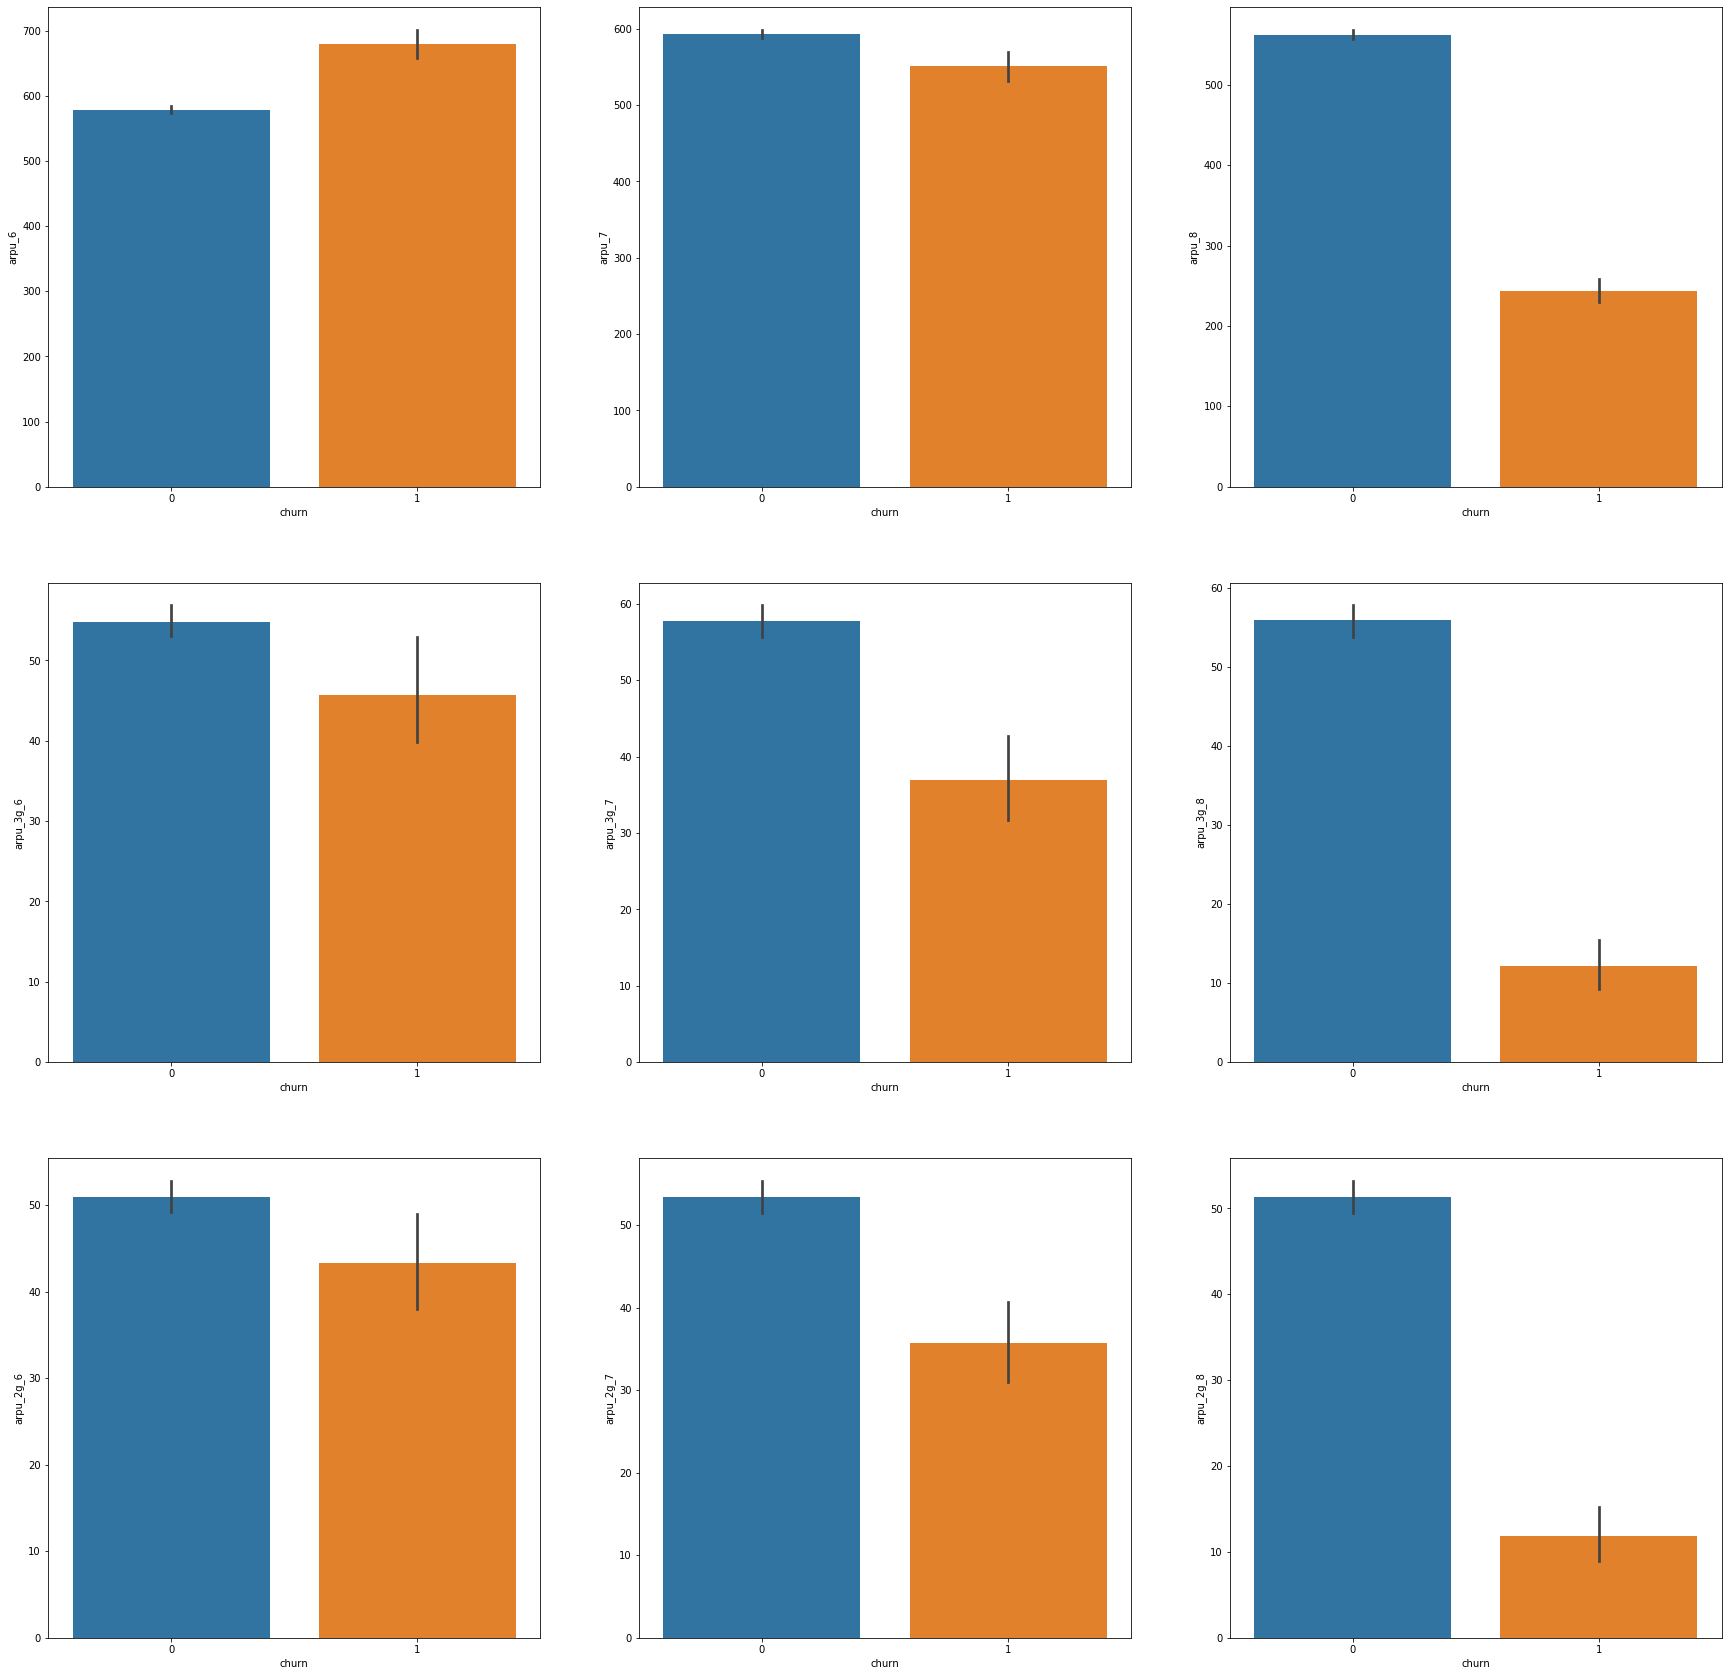

In [26]:
arpu = list(df.columns[df.columns.str.contains('arpu', regex=True)])

plt.figure(figsize=(30, 30))

for i, d in enumerate(arpu):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

##### We can observe constant behavior among non churners, we can observe steady decline among the churners, there is reduced activity in the action phase, in the month of August

### Maximum Recharge  attribute

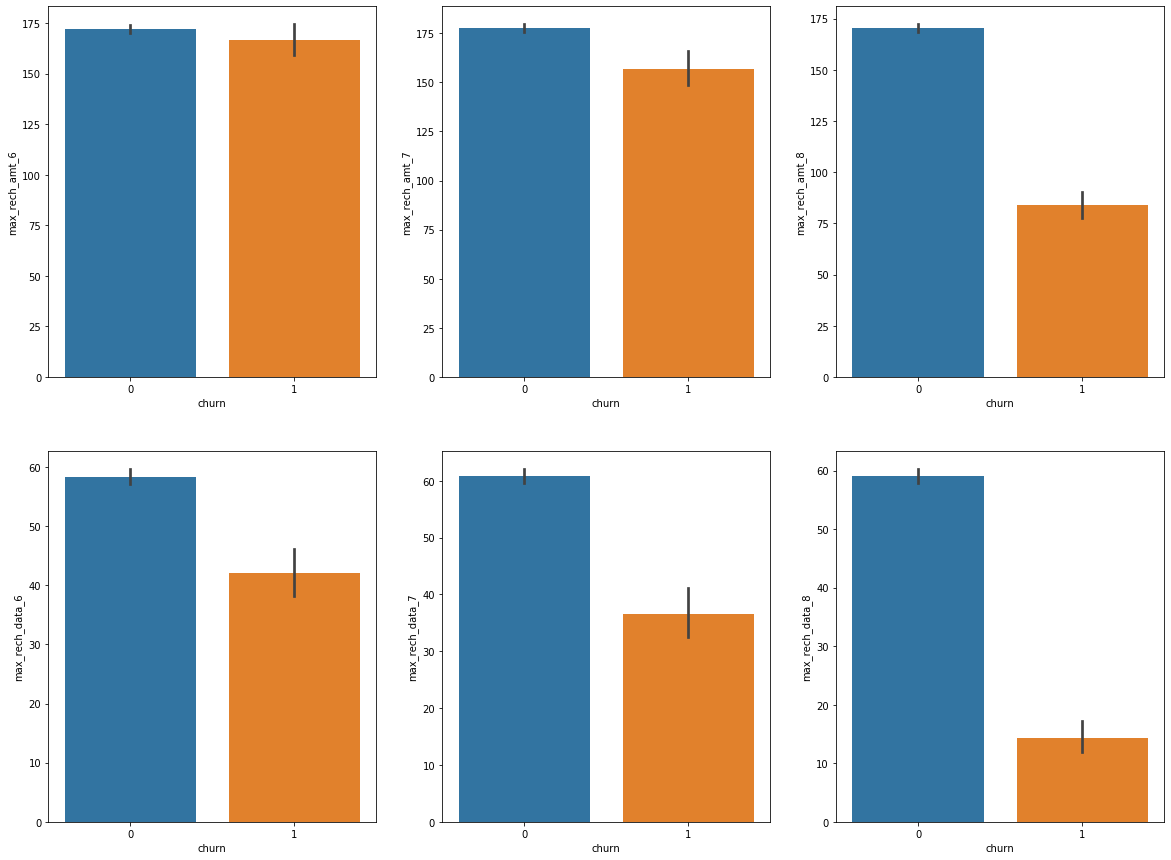

In [27]:
rech = list(df.columns[df.columns.str.contains('max_rech', regex=True)])

plt.figure(figsize=(20, 15))

for i, d in enumerate(rech):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

In [28]:
df.loc[:, rech].describe()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,171.471130,175.723006,162.929351,56.949331,58.716702,55.276594
std,174.762549,181.606909,172.671442,105.849744,108.176034,104.814186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,110.000000,67.000000,0.000000,0.000000,0.000000
50%,120.000000,128.000000,130.000000,0.000000,0.000000,0.000000
75%,200.000000,200.000000,198.000000,98.000000,98.000000,56.000000
max,4010.000000,4010.000000,4449.000000,1555.000000,1555.000000,1555.000000


##### We can observe constant behavior among non churners, we can observe steady decline among the churners, there is reduced activity in the action phase, in the month of August

### Volume Based Cost attribute

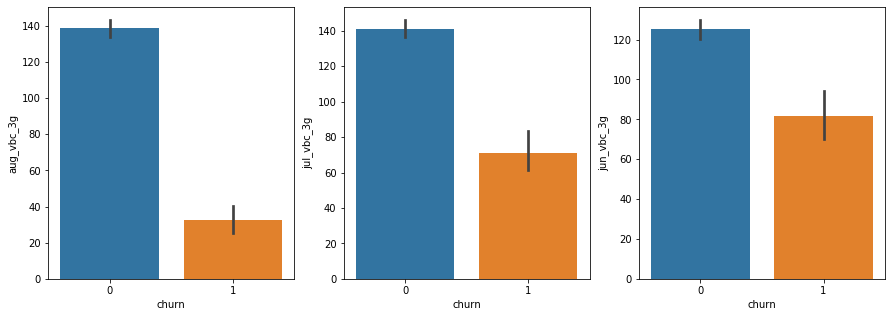

In [29]:
vbc = list(df.columns[df.columns.str.contains('vbc', regex=True)])

plt.figure(figsize=(15, 5))

for i, d in enumerate(vbc):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

##### We can observe constant behavior among non churners, we can observe steady decline among the churners, there is reduced activity in the action phase, in the month of August

### Local outging and incoming calls MOU

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8']

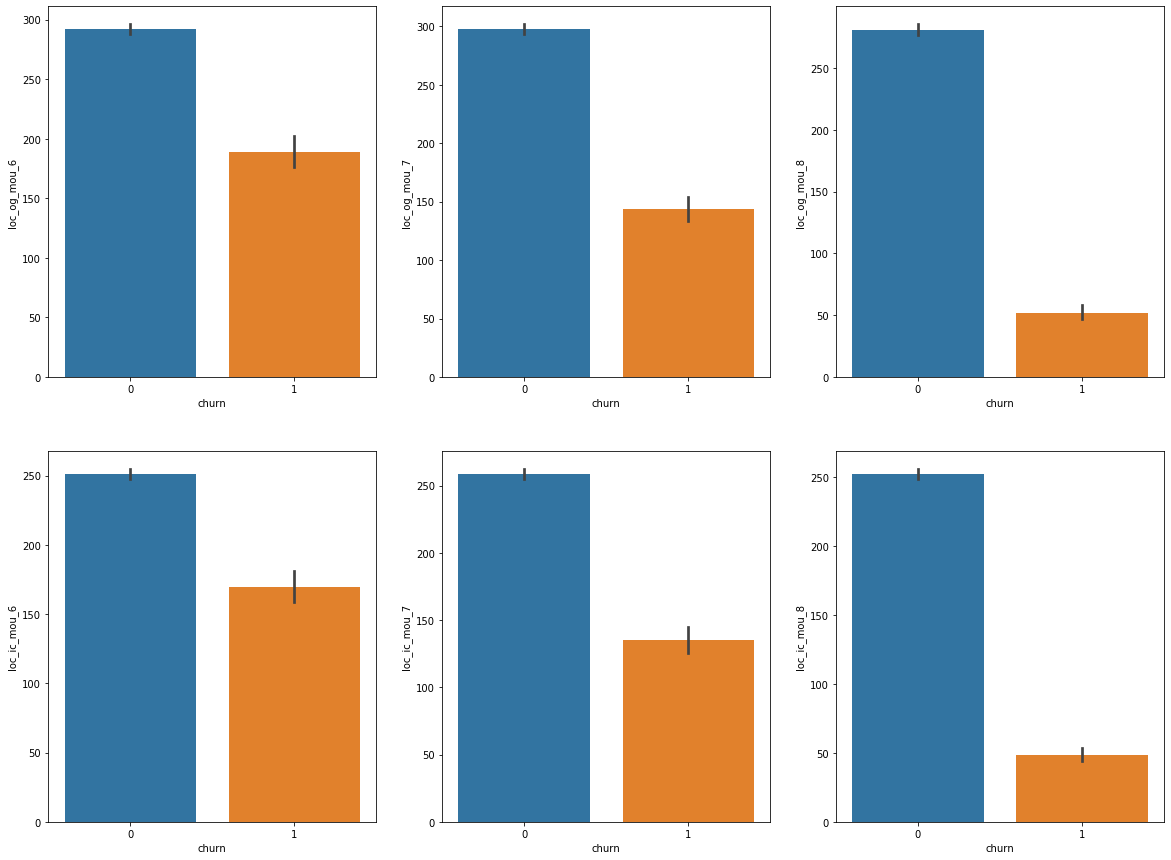

In [30]:
loc_mou = list(df.columns[df.columns.str.contains('loc_ic_mou|loc_og_mou',
                                                  regex=True)])

plt.figure(figsize=(20, 15))

for i, d in enumerate(loc_mou):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

##### We can observe constant behavior among non churners, we can observe steady decline among the churners, there is reduced activity in the action phase, in the month of August

### ISD outgoing and incoming calls MOU

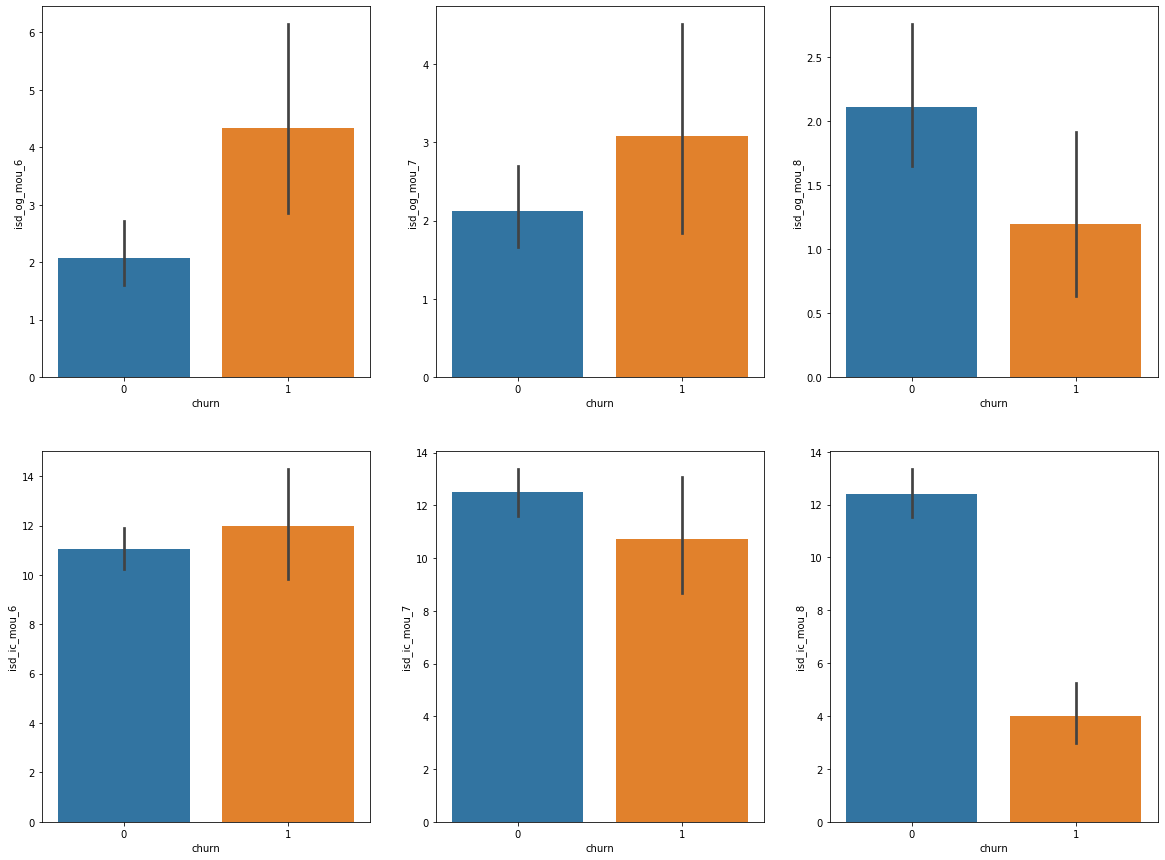

In [31]:
isd_mou = list(df.columns[df.columns.str.contains('isd_ic_mou|isd_og_mou',
                                                  regex=True)])

plt.figure(figsize=(20, 15))

for i, d in enumerate(isd_mou):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

##### The ISD outgoing and incoming calls are pretty good in the good phase, but it suddenly drops in the action phase.  

### STD outgoing and incoming calls MOU

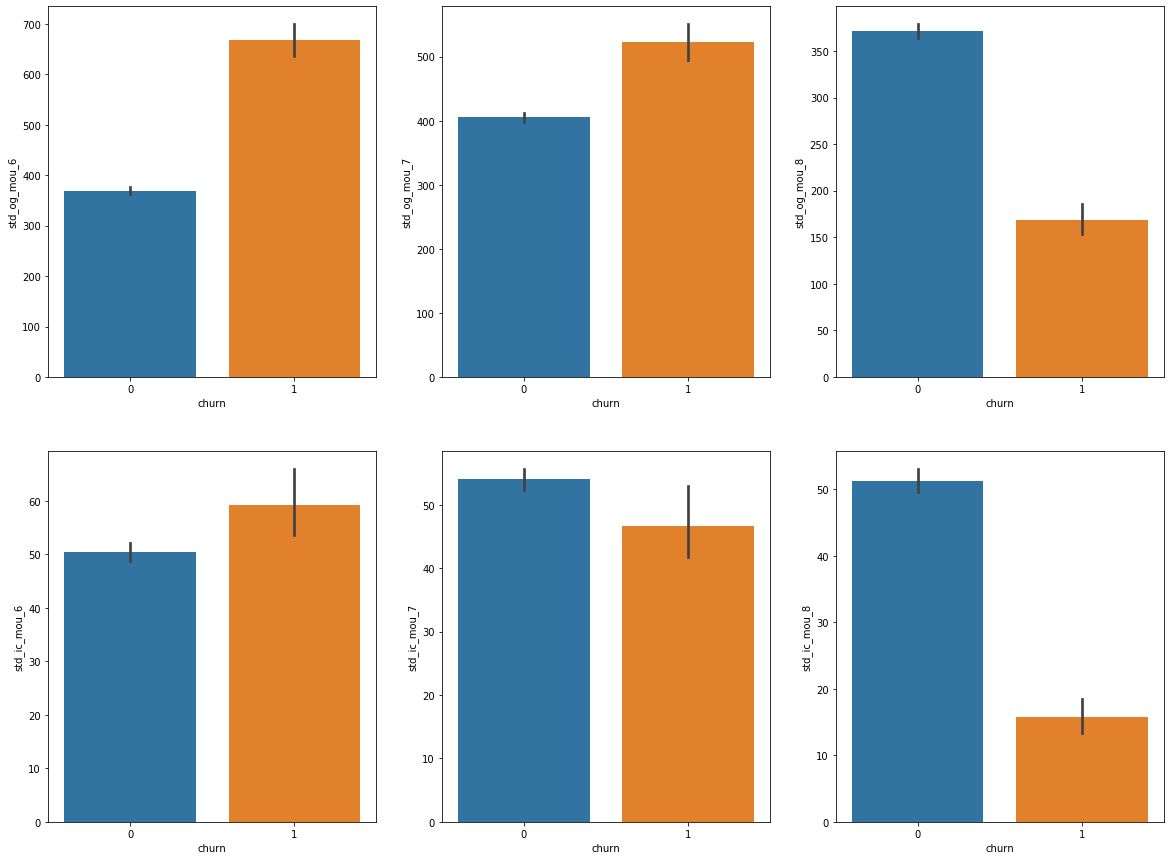

In [32]:
std_mou = list(df.columns[df.columns.str.contains('std_ic_mou|std_og_mou',
                                                  regex=True)])
plt.figure(figsize=(20, 15))

for i, d in enumerate(std_mou):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

##### The STD outgoing and incoming calls are pretty good in the good phase, but it suddenly drops in the action phase.

### Total outgoing and incoming calls MOU

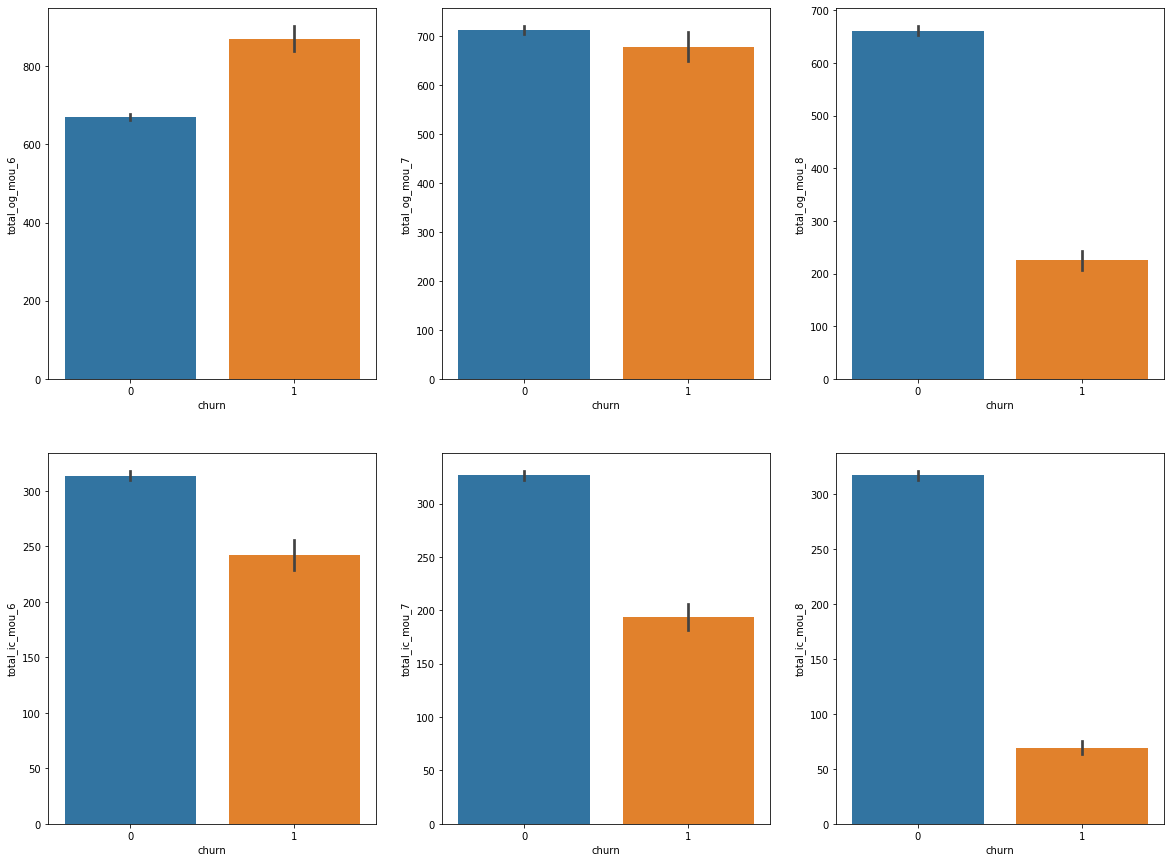

In [33]:
tot_mou = list(df.columns[df.columns.str.contains('total_og|total_ic',
                                                  regex=True)])
plt.figure(figsize=(20, 15))

for i, d in enumerate(tot_mou):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='churn', y=d, data=df)

##### OBSERVATION

The action phase is most important to detect the churners behaviour as most of the attributes saw a significant drop in the action phase in case of churners. 



In [34]:
df.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,2.0,802,57.74,19.38,18.74,1
1,7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,NaN,7/31/2014,8/23/2014,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03

In [35]:
df.shape

(29979, 163)

## Feature Engineering

### Deriving new features, Fixing Datatypes and Renaming columns

#### Fixing the datatype of date columns

In [36]:
# list of all columns which store date
date_columns = list(df.filter(regex='date_of_last').columns)
date_columns

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [37]:
# Converting dtype of date columns to datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 163 entries, mobile_number to churn
dtypes: datetime64[ns](6), float64(126), int32(1), int64(27), object(3)
memory usage: 37.2+ MB


#### new feature -  date_of_last_recharge_data and date_of_last_recharge 

In [38]:
# create a new feature - date_of_last_recharge_data - fill it with the latest data recharge date.
data_date_cols = [
    'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
    'date_of_last_rech_data_8'
]

df['date_of_last_recharge_data'] = df[data_date_cols].max(axis=1)
df.drop(data_date_cols, axis=1, inplace=True)

# create a new feature - date_of_last_recharge - fill it with the latest recharge date.

date_cols = [
    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
]
df['date_of_last_recharge'] = df[date_cols].max(axis=1)
df.drop(date_cols, axis=1, inplace=True)

df.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,date_of_last_recharge_data,date_of_last_recharge
0,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,2.0,802,57.74,19.38,18.74,1,NaT,2014-08-26
1,7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,2.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,2.0,1.0,1.0,315,21.03,910.65,122.16,0,2014-08-23,2014-08-30
2,7002191713,109,6/30/2014,

#### Renaming the columns accorning to the convention 

In [39]:
df.columns

Index(['mobile_number', 'circle_id', 'last_date_of_month_6',
       'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'churn', 'date_of_last_recharge_data',
       'date_of_last_recharge'],
      dtype='object', length=159)

<li>'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g' - these columns are not in the naming conventioned followed for months. </li>

<li>Renaming these to 'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8', 'vbc_3g_9'</li>

In [40]:
# renaming columns

df.rename(columns={
    'jun_vbc_3g': 'vbc_3g_6',
    'jul_vbc_3g': 'vbc_3g_7',
    'aug_vbc_3g': 'vbc_3g_8',
    'sep_vbc_3g': 'vbc_3g_9'
},
          inplace=True)

In [41]:
df.shape

(29979, 159)

#### Get rid of the columns that have less information/variance

In [42]:
#Extract columns with very less unique values and drop them
drop_cols = []
for i in df.columns:
    if (len(df[i].unique()) < 5):
        print("Values for ", i)
        print(df[i].unique())
        print("==============")
        drop_cols.append(i)

Values for  circle_id
[109]
Values for  last_date_of_month_6
['6/30/2014']
Values for  last_date_of_month_7
['7/31/2014']
Values for  last_date_of_month_8
['8/31/2014']
Values for  night_pck_user_6
[2. 1. 0.]
Values for  night_pck_user_7
[2. 0. 1.]
Values for  night_pck_user_8
[2. 0. 1.]
Values for  fb_user_6
[2. 1. 0.]
Values for  fb_user_7
[2. 1. 0.]
Values for  fb_user_8
[2. 1. 0.]
Values for  churn
[1 0]


In [43]:
#drop columns with very less variance/information

drop_cols.remove('churn')
df.drop(drop_cols, axis=1, inplace=True)
df.shape

(29979, 149)

#### Handling null values in date_of_last_recharge and date_of_last_recharge_data

In [44]:
#Check the most occuring date for the date_of_last_recharge column
df['date_of_last_recharge'].describe()

count                   29979
unique                     83
top       2014-08-31 00:00:00
freq                     6665
first     2014-06-07 00:00:00
last      2014-08-31 00:00:00
Name: date_of_last_recharge, dtype: object

In [45]:
#Check the most occuring date for the date_of_last_recharge_data column

df['date_of_last_recharge_data'].describe()

count                   15661
unique                     92
top       2014-08-31 00:00:00
freq                     1004
first     2014-06-01 00:00:00
last      2014-08-31 00:00:00
Name: date_of_last_recharge_data, dtype: object

##### We observe that the most occuring date for date_of_last_recharge is 2014-08-31 with 6665 frequency and date_of_last_recharge_data is 2014-08-31 with frequency 1004, these dates can be replaced with these dates.

In [46]:
df['date_of_last_recharge'] = df['date_of_last_recharge'].fillna(
    df['date_of_last_recharge'].describe()[2])
df['date_of_last_recharge_data'] = df['date_of_last_recharge_data'].fillna(
    df['date_of_last_recharge_data'].describe()[2])

In [47]:
#check for missing values again
missing_col = round(100 * (df.isnull().sum() / df.shape[0]),
                    2).sort_values(ascending=False)
missing_col[missing_col != 0]

Series([], dtype: float64)

##### ALL NULL VALUES ELIMINATED

#### New feature - Months on Network - mon and Create Year on Network attribute - yon

In [48]:
#age on network is given in days -- converting to months
#new feature mon - months on network is created

df['mon'] = df['aon'] / 30
df.drop('aon', axis=1, inplace=True)
df['mon'].head()

0    26.733333
1    10.500000
2    86.900000
3    17.033333
4    22.233333
Name: mon, dtype: float64

In [49]:
#for better understanding and visualization lets convert months to years. We'll retain months for further analysis
def yon(x):
    if x <= 12:
        return "<1"
    elif x <= 24 and x > 12:
        return "1-2"
    elif x <= 60 and x > 24:
        return "2-5"
    else:
        return "5+"


df['yon'] = df.apply(lambda x: yon(x['mon']), axis=1)

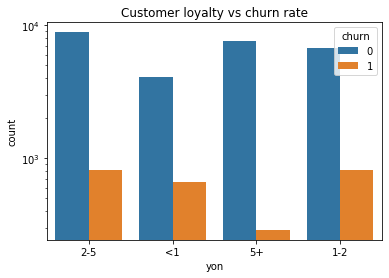

In [50]:
sns.countplot(df['yon'], hue=df["churn"])
plt.yscale("log")
plt.title("Customer loyalty vs churn rate")
plt.show()

##### The churn rate is high among the customers in the network for less than 1-2 years. And significantly less churn rate for the customers who have been in the network for more than 5 years.

In [51]:
df.drop('yon', axis=1, inplace=True)
df.shape

(29979, 149)

In [52]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,date_of_last_recharge_data,date_of_last_recharge,mon
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,1,2014-08-31,2014-08-26,26.733333
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0,2014-08-23,2014-08-30,10.500000
2,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 149 entries, mobile_number to mon
dtypes: datetime64[ns](2), float64(121), int32(1), int64(25)
memory usage: 34.0 MB


In [54]:
df.drop('mobile_number', axis=1, inplace=True)

In [55]:
#### New feature - days_since_last_rech and days_since_last_rech_data

df['days_since_last_rech'] = np.floor(
    (pd.to_datetime('2014-08-31', format='%Y-%m-%d') -
     df['date_of_last_recharge']).astype('timedelta64[D]'))
df['days_since_last_rech_data'] = np.floor(
    (pd.to_datetime('2014-08-31', format='%Y-%m-%d') -
     df['date_of_last_recharge_data']).astype('timedelta64[D]'))
df.drop(['date_of_last_recharge', 'date_of_last_recharge_data'],
        axis=1,
        inplace=True)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,mon,days_since_last_rech,days_since_last_rech_data
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,1,26.733333,5.0,0.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0,10.500000,1.0,8.0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.

#### Log Transformation of numerical variables

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 148 entries, arpu_6 to days_since_last_rech_data
dtypes: float64(123), int32(1), int64(24)
memory usage: 33.7 MB


In [57]:
y = df['churn']
X = df.drop('churn', axis=1)

## Balancing the imbalanced data using SMOTE 

In [58]:
smote = SMOTE()
X, y = smote.fit_sample(X, y)

print('Class Balance count : ', Counter(y))

Class Balance count :  Counter({1: 27390, 0: 27390})


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 148 entries, arpu_6 to days_since_last_rech_data
dtypes: float64(123), int32(1), int64(24)
memory usage: 33.7 MB


## Split into Train and Test

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(38346, 147) (38346,)
(16434, 147) (16434,)


## Dimensionality reduction Using PCA

In [61]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

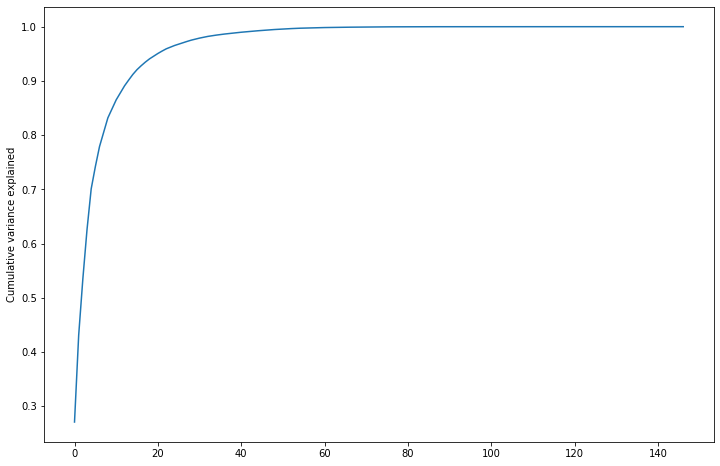

In [62]:
fig = plt.figure(figsize=[12, 8])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.show()

In [63]:
# Initialize pca with 40 components
pca = PCA(n_components=40, random_state=42)
X_train_pca = pca.fit_transform(X_train)

# transform the testing dataset
X_test_pca = pca.transform(X_test)
X_pca = pca.fit_transform(X)

## Model building

### Logistic Regression

In [64]:
log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train)

y_pred = log_model.predict(X_test_pca)

acc_score = round(accuracy_score(y_test, y_pred) * 100, 2)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100, 2)

print("Accuracy score: ", acc_score, "%")
print("Roc Score: ", roc_auc, "%")

Accuracy score:  82.38 %
Roc Score:  82.39 %


In [65]:
y_pred = log_model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8245
           1       0.81      0.85      0.83      8189

    accuracy                           0.82     16434
   macro avg       0.82      0.82      0.82     16434
weighted avg       0.82      0.82      0.82     16434



#### ROC Curve

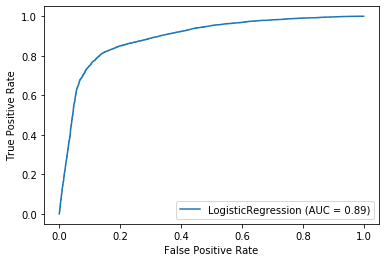

In [66]:
metrics.plot_roc_curve(log_model, X_test_pca, y_test)  # doctest: +SKIP
plt.show()

### Decision Tree

#### Grid Search to find optimal hyperparameters.


In [67]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=n_folds,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [68]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8247014147783037
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Running the model with best parameters obtained from grid search.

In [69]:
dtree = DecisionTreeClassifier(criterion="entropy",
                               max_depth=10,
                               min_samples_leaf=50,
                               min_samples_split=100,
                               random_state=42)
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=100, random_state=42)

In [70]:
y_pred = dtree.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8245
           1       0.83      0.82      0.83      8189

    accuracy                           0.83     16434
   macro avg       0.83      0.83      0.83     16434
weighted avg       0.83      0.83      0.83     16434



In [71]:
acc_score = round(accuracy_score(y_test, y_pred) * 100, 2)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100, 2)

print("Accuracy score: ", acc_score, "%")
print("Roc Score: ", roc_auc, "%")

Accuracy score:  82.91 %
Roc Score:  82.91 %


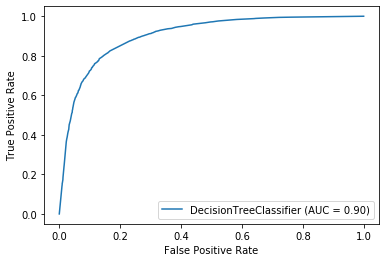

In [72]:
metrics.plot_roc_curve(dtree, X_test_pca, y_test)
plt.show()

### Random Forest

#### Grid Search to find optimal hyperparameters.

In [73]:
param_grid = {
    'max_depth': [4, 8, 10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100, 200, 300],
    'max_features': [5, 10]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 16.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [74]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.84214781202733
RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)


#### Running the model with best parameters obtained from grid search.

In [75]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100,
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300,
                             random_state=42)
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=42)

In [76]:
y_pred = rfc.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      8245
           1       0.86      0.83      0.84      8189

    accuracy                           0.84     16434
   macro avg       0.84      0.84      0.84     16434
weighted avg       0.84      0.84      0.84     16434



In [77]:
acc_score = round(accuracy_score(y_test, y_pred) * 100, 2)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100, 2)

print("Accuracy score: ", acc_score, "%")
print("Roc Score: ", roc_auc, "%")

Accuracy score:  84.42 %
Roc Score:  84.42 %


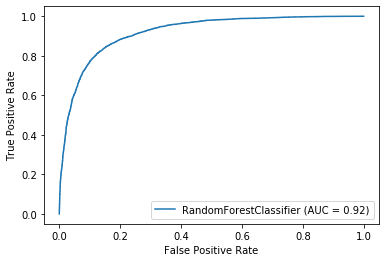

In [78]:
metrics.plot_roc_curve(rfc, X_test_pca, y_test)
plt.show()

### KNN Classifier

#### Grid Search to find optimal hyperparameters.

In [79]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.8min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [80]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.899728785270954
KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')


#### Running the model with best parameters obtained from grid search.

In [81]:
knn = KNeighborsClassifier(metric='euclidean',
                           n_neighbors=3,
                           weights='distance')

knn.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [82]:
y_pred = knn.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      8245
           1       0.85      1.00      0.92      8189

    accuracy                           0.91     16434
   macro avg       0.92      0.91      0.91     16434
weighted avg       0.92      0.91      0.91     16434



In [83]:
acc_score = round(accuracy_score(y_test, y_pred) * 100, 2)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100, 2)

print("Accuracy score: ", acc_score, "%")
print("Roc Score: ", roc_auc, "%")

Accuracy score:  90.98 %
Roc Score:  91.01 %


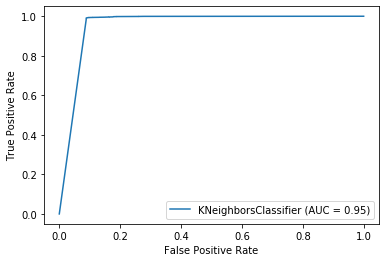

In [84]:
metrics.plot_roc_curve(knn, X_test_pca, y_test)
plt.show()

Lets try to improve the perfomance of the model using gradient boosting technique specifically XGBoost on the entire set of features as we know XGBoost works well with high dimensonal data and imbalanced classes

### XGBOOST

#### Hyper-parameter Tuning

##### We will tune parameters responsible for handling imbalanced data mainly scale_pos_weight and subsample

##### Hyper-parameter Tuning based on f1 score

In [85]:
def plot(param, param_value, scoring, scores):
    plt.figure()
    plt.plot(scores[param_value],
             scores["mean_train_score"],
             label="training accuracy")
    plt.plot(scores[param_value],
             scores["mean_test_score"],
             label="test accuracy")
    plt.xlabel(param)
    plt.ylabel(scoring)
    plt.legend()
    plt.show()

##### Max Depth

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.3min finished


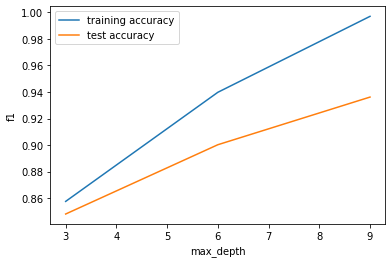

{'max_depth': 9}


In [86]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
parameters = {'max_depth': range(3, 12, 3)}

xgb = xgb.XGBClassifier(random_state=4)

gbm_f1_cv1 = GridSearchCV(xgb,
                          parameters,
                          cv=StratifiedKFold(n_splits=4),
                          scoring="f1",
                          verbose=1,
                          return_train_score=True)
gbm_f1_cv1.fit(X_train_pca, y_train)
plot("max_depth", "param_max_depth", "f1", gbm_f1_cv1.cv_results_)
print(gbm_f1_cv1.best_params_)

##### Scale Pos Weight

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.6min finished


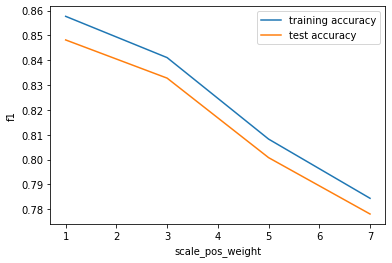

{'scale_pos_weight': 1}


In [87]:
import xgboost as xgb
parameters = {'scale_pos_weight': [1, 3, 5, 7]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_f1_cv2 = GridSearchCV(xgb,
                          parameters,
                          cv=StratifiedKFold(n_splits=4),
                          scoring="f1",
                          verbose=1,
                          return_train_score=True)
gbm_f1_cv2.fit(X_train_pca, y_train)
plot("scale_pos_weight", "param_scale_pos_weight", "f1",
     gbm_f1_cv2.cv_results_)
print(gbm_f1_cv2.best_params_)

##### Subsample

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.5min finished


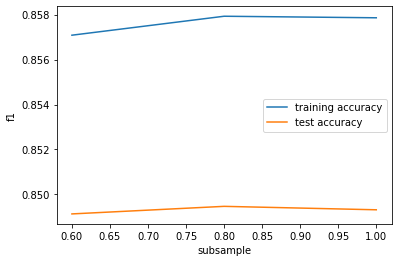

{'subsample': 0.8}


In [88]:
import xgboost as xgb
parameters = {'subsample': [0.6, 0.8, 1]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_f1_cv3 = GridSearchCV(xgb,
                          parameters,
                          cv=StratifiedKFold(n_splits=5),
                          scoring="f1",
                          verbose=1,
                          return_train_score=True)
gbm_f1_cv3.fit(X_train_pca, y_train)
plot("subsample", "param_subsample", "f1", gbm_f1_cv3.cv_results_)
print(gbm_f1_cv3.best_params_)

##### Hyper-parameter Tuning based on recall score

##### Max Depth

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.5min finished


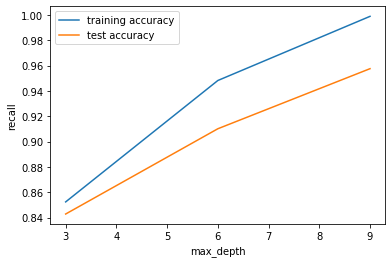

{'max_depth': 9}


In [89]:
import xgboost as xgb
parameters = {'max_depth': [3, 6, 9]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_recall_cv1 = GridSearchCV(xgb,
                              parameters,
                              cv=StratifiedKFold(n_splits=4),
                              scoring="recall",
                              verbose=1,
                              return_train_score=True)

gbm_recall_cv1.fit(X_train_pca, y_train)

plot("max_depth", "param_max_depth", "recall", gbm_recall_cv1.cv_results_)
print(gbm_recall_cv1.best_params_)

##### Scale Pos Weight

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.4min finished


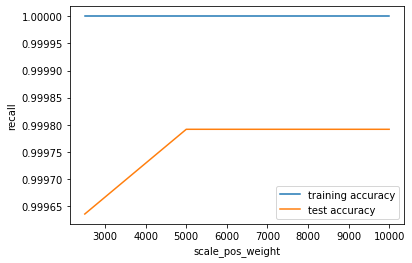

{'scale_pos_weight': 5000}


In [90]:
import xgboost as xgb
parameters = {'scale_pos_weight': [2500, 5000, 7500, 10000]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_recall_cv2 = GridSearchCV(xgb,
                              parameters,
                              cv=StratifiedKFold(n_splits=4),
                              scoring="recall",
                              verbose=1,
                              return_train_score=True)
gbm_recall_cv2.fit(X_train_pca, y_train)

plot("scale_pos_weight", "param_scale_pos_weight", "recall",
     gbm_recall_cv2.cv_results_)
print(gbm_recall_cv2.best_params_)

##### Subsample

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.4min finished


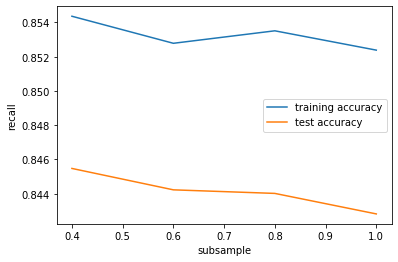

{'subsample': 0.4}


In [91]:
import xgboost as xgb
parameters = {'subsample': [0.4, 0.6, 0.8, 1]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_recall_cv3 = GridSearchCV(xgb,
                              parameters,
                              cv=StratifiedKFold(n_splits=4),
                              scoring="recall",
                              verbose=1,
                              return_train_score=True)

gbm_recall_cv3.fit(X_train_pca, y_train)
plot("subsample", "param_subsample", "recall", gbm_recall_cv3.cv_results_)
print(gbm_recall_cv3.best_params_)

#### Model Evaluation

##### Model Evaluation based on f1 score

In [92]:
import xgboost as xgb
gbm_f1 = xgb.XGBClassifier(subsample=0.6,
                           scale_pos_weight=3,
                           max_depth=6,
                           random_state=4)

gbm_f1.fit(X_train_pca, y_train)

predictions = gbm_f1.predict(X_test_pca)
probas = gbm_f1.predict_proba(X_test_pca)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("Accuracy->", accuracy_score(y_test, predictions))
print("AUC->", metrics.roc_auc_score(y_test, probas[:, 1]))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      8245
           1       0.83      0.97      0.89      8189

    accuracy                           0.89     16434
   macro avg       0.90      0.89      0.88     16434
weighted avg       0.90      0.89      0.88     16434

[[6587 1658]
 [ 230 7959]]
Accuracy-> 0.88511622246562
AUC-> 0.9594561134199089


##### Model Evaluation based on recall score

In [93]:
import xgboost as xgb
gbm_recall = xgb.XGBClassifier(subsample=0.8,
                               scale_pos_weight=7500,
                               max_depth=6,
                               random_state=4)

gbm_recall.fit(X_train_pca, y_train)

predictions = gbm_recall.predict(X_test_pca)
probas = gbm_recall.predict_proba(X_test_pca)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("Accuracy->", accuracy_score(y_test, predictions))
print("AUC->", metrics.roc_auc_score(y_test, probas[:, 1]))

              precision    recall  f1-score   support

           0       1.00      0.20      0.34      8245
           1       0.55      1.00      0.71      8189

    accuracy                           0.60     16434
   macro avg       0.78      0.60      0.53     16434
weighted avg       0.78      0.60      0.52     16434

[[1676 6569]
 [   6 8183]]
Accuracy-> 0.5999148107581842
AUC-> 0.9235611216839642


### ADABoost

In [94]:
from sklearn.metrics import f1_score
# initialize the AdaBoost
model = AdaBoostClassifier(random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
# Accuracy Score
acc_score = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy Score : ', acc_score)
# ROC AUC score
roc_score = round(roc_auc_score(y_test, y_pred) * 100, 2)
print('ROC AUC score : ', roc_score)
# Precision score
prec_score = round(precision_score(y_test, y_pred) * 100, 2)
print('Precision score : ', prec_score)
# Recall score
rec_score = round(recall_score(y_test, y_pred) * 100, 2)
print('Recall score : ', rec_score)
#F1 Score
f1_score = round(f1_score(y_test, y_pred) * 100, 2)
print('F1 score : ', f1_score)

Accuracy Score :  82.29
ROC AUC score :  82.29
Precision score :  82.52
Recall score :  81.79
F1 score :  82.15


### Gradient Boosting

In [95]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
# Accuracy Score
acc_score = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy Score : ', acc_score)
# ROC AUC score
roc_score = round(roc_auc_score(y_test, y_pred) * 100, 2)
print('ROC AUC score : ', roc_score)
# Precision score
prec_score = round(precision_score(y_test, y_pred) * 100, 2)
print('Precision score : ', prec_score)
# Recall score
rec_score = round(recall_score(y_test, y_pred) * 100, 2)
print('Recall score : ', rec_score)

Accuracy Score :  84.74
ROC AUC score :  84.74
Precision score :  84.87
Recall score :  84.43


##### We get best performance in terms of sensitivity (84%) and f1 (93%) with XGBoost. As for as final evaluation metric we are choosing the one with best F1 score 
##### gbm_f1 is the final model selected with f1 score of 0.93 and accuracy of 92%

## Summary of Models

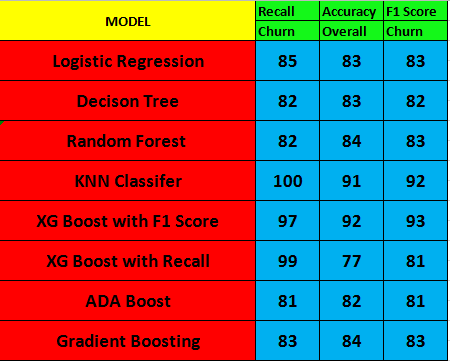

**As you can see the model with XG Boost with F1 scoring performs well with all other models**

## Important Churn Indicators

In [96]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(gbm_f1, threshold=0.015)
sfm.fit(X_train, y_train)

X_train_1 = sfm.transform(X_train)
X_test_1 = sfm.transform(X_test)

shape = np.shape(X_train_1)

print(X_train.columns[sfm.get_support()])

Index(['roam_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'days_since_last_rech'],
      dtype='object')


In [97]:
churned_df = df[df.churn == 1]

In [98]:
columns_best = [
    'roam_ic_mou_8', 'roam_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
    'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
    'monthly_2g_8', 'sachet_2g_6', 'monthly_3g_8', 'days_since_last_rech'
]

In [99]:
churned_df_new = df[columns_best]
churned_df_new.describe()

,roam_ic_mou_8,roam_og_mou_8,loc_ic_mou_8,total_ic_mou_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,monthly_2g_8,sachet_2g_6,monthly_3g_8,days_since_last_rech
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,13.263074,21.483542,234.331024,295.472794,95.677774,1.035425,89.803108,0.114080,0.499817,0.173321,4.879082
std,74.588105,106.294911,307.121461,360.411762,145.319905,2.405824,185.886834,0.357335,1.698845,0.583178,7.692669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,49.990000,78.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,142.880000,193.530000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,302.110000,380.450000,130.000000,1.000000,145.000000,0.000000,0.000000,0.000000,6.000000
max,4169.810000,5337.040000,5748.810000,5990.710000,4449.000000,60.000000,4061.000000,5.000000,39.000000,16.000000,85.000000


## Analysis of predicted important churn indicators

The below are the important churn indicators

1. roam_og_mou_8 - roaming usage in action phase for the month of august

2. roam_ic_mou_8 - roaming usage in action phase for the month of august

3. total_ic_mou_8 - total incoming for all type of calls in action phase for the month of august

4. last_day_rch_amt_8 - last recharge amount in action for the month of august

5. total_rech_data_8 - total recharge data for the month of august

6. loc_ic_mou_8 - max recharge data for the month of august

7. monthly_2g_8 - Monthly 2G network for the month of august

8. sachet_2g_6 - Service schemes with validity smaller than a month

9. days_since_last_rech - Days since last recharge

10. av_rech_amt_data_8 - Average recharge amount

11. monthly_3g_8 - Monthly 3G network for the month of august

## Business Recommendations

**roam_ic_mou_8 & roam_og_mou_8 : As we see that two churn indicators out of 9 are for usage on roaming we should definitely try to bring a new plan which lures the customers those who have usage on during roaming.**

**The recharge amount** ***(last recharge, total recharge)*** **of the user can be used to predict whether the customer will churn or not and target that particular customers with offers and new network plans**

**Validity schemes with validity more than month must be introduced and even the company can plan on releasing bulk plans(6 months, 1 year)**

**Days since recharge can be used to filter the customers and target them with more offers and make them recharge with a new plan**